In [1]:
import csv

In [2]:
import json

In [3]:
import pandas as pd

In [4]:
import matplotlib.pyplot as plt

In [5]:
plt.rcParams["figure.figsize"] = (9,6)

In [6]:
rank = pd.read_csv("data/rank.csv")

In [7]:
point = pd.read_json("data/sums.json")

In [8]:
ac = pd.read_json("data/ac.json")

In [9]:
point = point.set_index("user_id")

In [10]:
ac = ac.set_index("user_id")

In [11]:
point_dic = point["point_sum"].to_dict()

In [12]:
ac_dic = ac["problem_count"].to_dict()

In [13]:
points = []
for i, user in enumerate(rank["user"]):
    if user in point_dic:
        points.append(point_dic[user])
    else:
        points.append(None)

In [14]:
rank["rated point sum"] = points

In [15]:
acs = []
for i, user in enumerate(rank["user"]):
    if user in ac_dic:
        acs.append(ac_dic[user])
    else:
        acs.append(None)

In [16]:
rank["ac"] = acs

In [17]:
rank.head()

,rank,country,user,affiliation,birth,rating,highest,match,win,rated point sum,ac
0,1,BY,tourist,ITMO University,1994.0,4044,4208,31,14,171600.0,196.0
1,2,RU,Petr,NaN,1985.0,3854,3854,30,2,135300.0,150.0
2,3,RU,LHiC,Moscow SU,NaN,3764,3812,35,2,354400.0,506.0
3,4,CN,apiad,unknown,1997.0,3722,3776,27,4,121500.0,139.0
4,5,RU,Um_nik,HSE,1996.0,3716,3919,32,4,173500.0,233.0


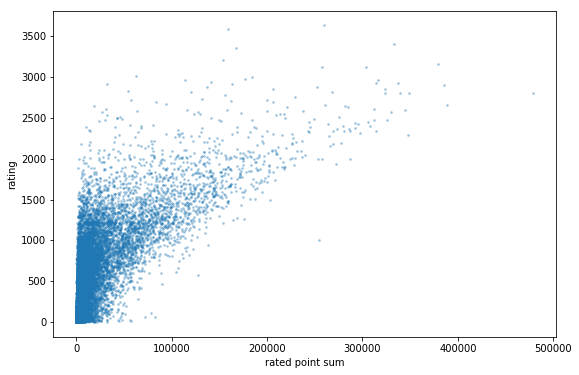

In [18]:
rank[rank["country"] == "JP"].plot.scatter(x="rated point sum", y="rating", s=3, alpha=0.3)
plt.savefig("images/rated_point_sum_vs_rating.png")

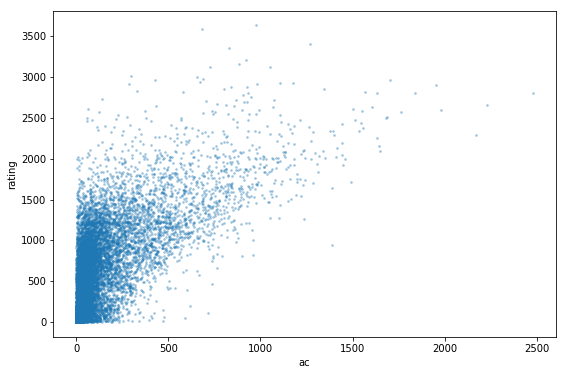

In [19]:
rank[rank["country"] == "JP"].plot.scatter(x="ac", y="rating", s=3, alpha=0.3)